# Setup

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data

In [7]:
# Data fiktif
np.random.seed(42)  # Untuk hasil yang konsisten

data = {
    'group': ['A'] * 100 + ['B'] * 100,
    'conversion': np.random.binomial(1, 0.12, 100).tolist() + np.random.binomial(1, 0.18, 100).tolist()
}

df = pd.DataFrame(data)
print(df.head())

  group  conversion
0     A           0
1     A           1
2     A           0
3     A           0
4     A           0


# T-Test

In [8]:
conversion_rate_A = df[df['group'] == 'A']['conversion'].mean()
conversion_rate_B = df[df['group'] == 'B']['conversion'].mean()

print(f"Conversion Rate A: {conversion_rate_A:.2%}")
print(f"Conversion Rate B: {conversion_rate_B:.2%}")

# Pisahkan data berdasarkan grup
group_A = df[df['group'] == 'A']['conversion']
group_B = df[df['group'] == 'B']['conversion']

# Lakukan uji t
t_stat, p_value = stats.ttest_ind(group_A, group_B)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

Conversion Rate A: 11.00%
Conversion Rate B: 19.00%
T-Statistic: -1.5862795352958727
P-Value: 0.11427163163612526


# Viz

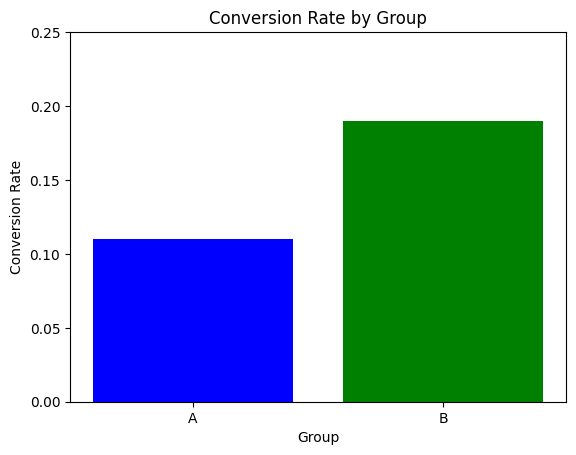

In [9]:
# Visualisasi hasil konversi
conversion_rates = df.groupby('group')['conversion'].mean()

plt.bar(conversion_rates.index, conversion_rates.values, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Group')
plt.ylim(0, 0.25)
plt.show()

# Result

In [11]:
if p_value < 0.05:
    print("Ada perbedaan signifikan antara grup A dan B.")
else:
    print("Tidak ada perbedaan signifikan antara grup A dan B.")

Tidak ada perbedaan signifikan antara grup A dan B.
